# Fundamentos de Machine Learning com Scikit-Learn

## A Importância Crítica do Pré-Processamento de Dados

No mundo do Machine Learning, os modelos são como chefs talentosos. Um chef talentoso pode ter as melhores receitas (algoritmos) e as melhores ferramentas (hardware), mas se os ingredientes (dados) forem de má qualidade, sujos ou mal preparados, o prato final (previsões do modelo) certamente não será bom. O pré-processamento de dados é exatamente isso: a preparação meticulosa dos ingredientes para garantir que o chef possa criar a melhor refeição possível.

Dados brutos, frequentemente, vêm com problemas como:

*   **Valores Ausentes (Missing Values):** Lacunas nas informações que podem confundir o modelo.
*   **Formato Inconsistente:** Dados no formato errado ou com erros de digitação.
*   **Outliers (Valores Atípicos):** Pontos de dados extremos que podem distorcer a percepção do modelo.
*   **Diferentes Escalas:** Variáveis com magnitudes muito distintas, fazendo com que o modelo dê mais peso a uma do que a outra, injustamente.
*   **Assimetria (Skewness):** Distribuições de dados enviesadas que podem dificultar a aprendizagem de certos algoritmos.

Ignorar estas questões pode levar a modelos que não generalizam bem, produzem previsões imprecisas e desperdiçam recursos computacionais e tempo de desenvolvimento. Em essência, `garbage in, garbage out` (lixo entra, lixo sai) é um adágio que ressoa profundamente no Machine Learning. Mesmo o algoritmo mais sofisticado falhará se for alimentado com dados ruins.

### Objetivos desta Aula

Esta aula visa equipá-lo com as habilidades e ferramentas necessárias para transformar dados brutos em um formato que otimize o desempenho dos seus modelos de Machine Learning. Especificamente, abordaremos:

*   **Identificação e Tratamento de Valores Ausentes:** Estratégias para preencher lacunas em seus dados, como imputação por média, mediana ou modos.
*   **Normalização e Escalonamento:** Técnicas para ajustar a escala das suas variáveis, como `MinMaxScaler` e `StandardScaler`, garantindo que nenhuma feature domine o processo de aprendizagem devido à sua magnitude.
*   **Detecção e Tratamento de Outliers:** Métodos para identificar e gerenciar valores atípicos que podem impactar negativamente o modelo.
*   **Transformação de Dados Assimétricos:** Como usar transformações logarítmicas ou de potência (como `PowerTransformer`) para tornar as distribuições de dados mais simétricas, o que é benéfico para muitos algoritmos.
*   **Introdução a Ferramentas Essenciais:** Exploraremos o uso de `Pipeline` e `ColumnTransformer` da biblioteca `scikit-learn`. Estas ferramentas são cruciais para construir fluxos de trabalho de pré-processamento robustos, organizados e eficientes, permitindo aplicar diferentes transformações a diferentes colunas e evitar o vazamento de dados.

### Carregamento e Exploração Inicial dos Dados Ausentes




In [11]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# montar o drive no Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# caminho para o arquivo
PATH='/content/drive/MyDrive/Pos_Graduacao/FundamentosMachineLearning/data/cs-training.csv'
data = pd.read_csv(PATH, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
# separando treino e teste
target = 'SeriousDlqin2yrs'
x = data.drop(columns=[target])
y = data[[target]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=12,
    stratify=y
)

#### Valores Ausentes

Valores ausentes (NaNs - "Not a Number") são um problema comum e significativo em muitos conjuntos de dados do mundo real. Eles representam informações que não foram coletadas ou estão indisponíveis por diversas razões, como erros de entrada de dados, falhas de sensores, privacidade ou dados perdidos. Ignorar ou tratar incorretamente valores ausentes pode ter consequências drásticas para o desempenho e a confiabilidade dos modelos de Machine Learning.

##### Implicações Principais:

 - **Distorção de Estatísticas**: A ausência de dados pode levar a cálculos imprecisos de médias, medianas, variâncias e correlações, resultando em uma compreensão equivocada da distribuição dos dados e das relações entre as variáveis.

 - **Viesamento do Modelo**: Se os valores ausentes não forem aleatórios (ou seja, eles seguem um padrão), o tratamento inadequado pode introduzir viés no modelo. Por exemplo, se a renda (MonthlyIncome) estiver ausente principalmente para pessoas em certas faixas etárias, preencher com a média geral pode mascarar padrões importantes.

 - **Redução da Potência Preditiva**: Muitos algoritmos de ML não conseguem lidar diretamente com valores ausentes e exigem que eles sejam tratados. A remoção de linhas ou colunas com NaNs pode resultar na perda de uma quantidade significativa de dados valiosos, diminuindo o poder preditivo do modelo.

 - **Aumento da Complexidade**: Algoritmos sensíveis a valores ausentes (como muitos modelos baseados em gradiente) podem falhar ou produzir resultados erráticos. Isso exige que o cientista de dados invista tempo adicional em estratégias de imputação.

 - **Vazamento de Dados (Data Leakage)**: Se a imputação for feita usando informações de todo o conjunto de dados (treino e teste) antes da divisão, pode ocorrer vazamento de dados, levando a uma superestimação do desempenho do modelo.

 - **Representação Incorreta da Realidade**: Se a causa da ausência de dados for significativa (por exemplo, ausência de registro para clientes que cancelaram), imputar um valor pode apagar uma informação importante que o modelo poderia aprender.

##### Estratégias de Tratamento Comuns:

- **Remoção**: Excluir linhas (amostras) ou colunas (features) que contêm valores ausentes. Simples, mas pode levar à perda de dados.
- **Imputação**: Preencher os valores ausentes com estimativas, como média, mediana, moda, um valor constante ou técnicas mais sofisticadas como k-NN ou regressão.
- **Modelagem Específica**: Alguns algoritmos (como XGBoost ou LightGBM) podem lidar com valores ausentes de forma intrínseca.

A escolha da estratégia depende da quantidade de valores ausentes, do tipo de dados, da natureza do problema e do algoritmo de ML a ser utilizado.

In [4]:
# criar uma cópia dos dados - remoção dos NaN
data_rem = data.copy()
data_rem = data_rem.dropna()

<Axes: >

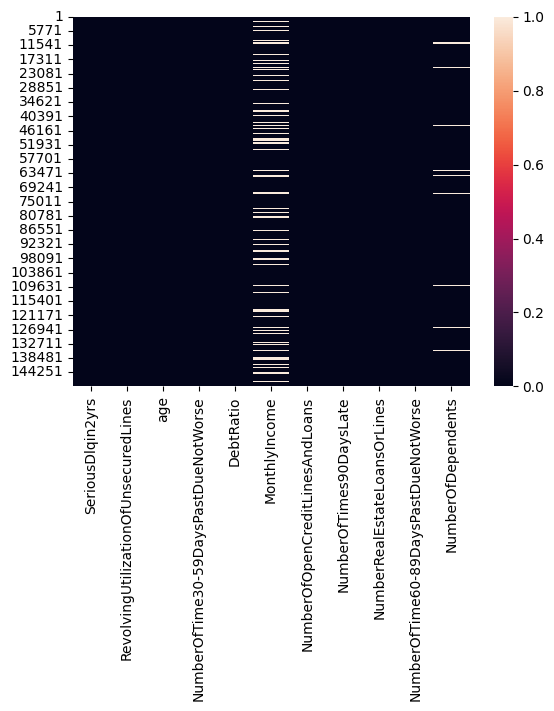

In [6]:
# verificando os dados nulos
sns.heatmap(data.isna())

In [5]:
print(data.shape)
print(data_rem.shape)

(150000, 11)
(120269, 11)


In [9]:
display(data[['SeriousDlqin2yrs']].value_counts(normalize=True))
display(data_rem[['SeriousDlqin2yrs']].value_counts(normalize=True))

,proportion
SeriousDlqin2yrs,
0,0.93316
1,0.06684


,proportion
SeriousDlqin2yrs,
0,0.930514
1,0.069486


In [10]:
display(data.describe())
display(data_rem.describe())

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Escalas Diferentes Outliers e Assimetria

##### Escalas Diferentes

O Problema: Muitas features em um dataset podem ter magnitudes e unidades de medida amplamente diferentes. Por exemplo, uma coluna 'idade' pode variar de 0 a 100, enquanto uma coluna 'renda mensal' pode variar de 0 a centenas de milhares. Algoritmos baseados em distância, como K-Means, K-Nearest Neighbors (KNN), Support Vector Machines (SVM) e redes neurais, são particularmente sensíveis a essas diferenças de escala.

O Impacto:

- **Domínio de Features**: Features com valores maiores podem dominar as funções de custo e as métricas de distância, fazendo com que o algoritmo dê a elas um peso desproporcional, independentemente de sua real importância preditiva.
- **Convergência Lenta:** Em algoritmos de otimização baseados em gradiente (como os usados em redes neurais), features em escalas diferentes podem levar a superfícies de custo alongadas e dificultar a convergência, tornando o treinamento mais lento e menos estável.
- **Desempenho Subótimo:** O modelo pode não conseguir aprender as relações verdadeiras entre as features ou pode superajustar-se a features com escalas maiores.

Por que tratar? A padronização ou normalização das features garante que todas elas contribuam igualmente para o processo de aprendizado, permitindo que os algoritmos funcionem de forma mais eficaz e produzam resultados mais precisos e robustos.

##### Outliers (Valores Atípicos)

O Problema: Outliers são pontos de dados que se desviam significativamente de outras observações. Eles podem ser resultado de erros de medição, erros de entrada de dados, ou simplesmente representar eventos raros e extremos na realidade.

O Impacto:

- **Distorção de Estatísticas**: Outliers podem influenciar drasticamente a média e o desvio padrão de uma feature, o que, por sua vez, afeta técnicas de escalonamento (como a padronização).
- **Impacto no Modelo**: Muitos algoritmos, como Regressão Linear, SVMs, e até mesmo algumas árvores de decisão, são sensíveis a outliers. Eles podem distorcer os limites de decisão, levar a modelos enviesados ou fazer com que o modelo superajuste os pontos de dados atípicos.
- **Redução da Generalização**: Um modelo treinado em dados com outliers não tratados pode ter dificuldades em generalizar para novos dados, pois seus pesos podem ter sido excessivamente ajustados para acomodar esses valores extremos.

Por que tratar? A identificação e o tratamento adequado de outliers (remoção, transformação ou imputação robusta) são essenciais para garantir que o modelo capture os padrões subjacentes da maioria dos dados, melhorando sua robustez e capacidade de generalização.

##### Distribuições Assimétricas (Skewness)

O Problema: Uma distribuição de dados é assimétrica quando não é simétrica em torno de sua média. Assimetria positiva (cauda à direita) indica que há mais valores altos extremos, enquanto assimetria negativa (cauda à esquerda) indica mais valores baixos extremos.

O Impacto:

- **Violação de Suposições**: Muitos algoritmos de ML, especialmente os paramétricos (como Regressão Linear), assumem que as features (ou os resíduos) seguem uma distribuição normal. A assimetria pode violar essas suposições, levando a inferências inválidas ou a um desempenho de modelo subótimo.
- **Redução da Performance**: A presença de uma cauda longa pode fazer com que o algoritmo dê mais peso aos valores na cauda, diminuindo a importância dos valores na parte central da distribuição.
- **Sensibilidade a Outliers**: Distribuições altamente assimétricas muitas vezes contêm outliers naturais na cauda mais longa, exacerbando os problemas mencionados acima.

Por que tratar? Transformações de potência (como transformações logarítmicas ou de Box-Cox) podem ajudar a reduzir a assimetria, tornando a distribuição mais gaussiana. Isso pode melhorar o desempenho de modelos que pressupõem normalidade e tornar o modelo mais robusto.

### Transformador: SimpleImputer para Valores Ausentes

Valores ausentes (NaNs) são comuns em datasets reais e, como discutido anteriormente, podem prejudicar significativamente o treinamento e a performance de modelos de Machine Learning. A **imputação** é o processo de preencher esses valores ausentes com valores substitutos, mantendo a integridade do dataset e minimizando o impacto negativo.

### Estratégias de Imputação Comuns:

*   **Média (Mean Imputation):** Substitui valores ausentes pela média da coluna. Simples e rápido, mas pode distorcer a distribuição original e reduzir a variância.
*   **Mediana (Median Imputation):** Substitui valores ausentes pela mediana da coluna. Mais robusta a outliers do que a média e não distorce tanto a distribuição. É uma boa escolha para dados assimétricos.
*   **Moda (Mode Imputation):** Substitui valores ausentes pelo valor mais frequente na coluna. Geralmente usado para dados categóricos, mas também pode ser aplicado a dados numéricos discretos.
*   **Valor Constante:** Preenche os NaNs com um valor específico (ex: 0, -1, 'unknown'). Pode ser útil quando o valor ausente em si tem um significado particular.
*   **Imputação Avançada:** Técnicas mais sofisticadas incluem imputação baseada em modelos (como k-NN, regressão, ou MICE - Multiple Imputation by Chained Equations), que tentam prever os valores ausentes com base em outras features. No entanto, são mais complexas computacionalmente.

### `SimpleImputer` do Scikit-learn

O `SimpleImputer` é uma ferramenta do scikit-learn que oferece uma maneira fácil e eficiente de aplicar as estratégias de imputação mais básicas. Ele é projetado para ser integrado em pipelines de pré-processamento e é fundamental para garantir que os modelos recebam dados completos.

#### Como funciona:

1.  **`fit()`**: O `SimpleImputer` aprende os parâmetros da estratégia de imputação a partir dos dados de treinamento (e.g., calcula a mediana das colunas no `X_train`).
2.  **`transform()`**: O imputer usa os parâmetros aprendidos para preencher os valores ausentes nos dados (tanto no `X_train` quanto no `X_test`). É crucial aplicar o `transform` no `X_test` usando os parâmetros aprendidos no `X_train` para evitar vazamento de dados (data leakage).

Nesta seção, demonstraremos a aplicação do `SimpleImputer` usando a estratégia de 'mediana', que é uma escolha robusta para muitas distribuições de dados numéricos e ajuda a mitigar o impacto de outliers.

In [15]:
# criando um objeto imputer
imputer = SimpleImputer(strategy='median')

# calculando a estatística
imputer.fit(x_train)

SimpleImputer(strategy='median')

In [18]:
# realizando a imputação
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

### Transformador: Scalers para Escalonamento

O escalonamento de features é uma etapa crucial no pré-processamento de dados para muitos algoritmos de Machine Learning. Consiste em ajustar a escala das features numéricas para que elas estejam em um intervalo padronizado, sem distorcer as diferenças nos intervalos de valores ou perder informações importantes.

#### Por que é Necessário?

Algoritmos que calculam distâncias entre pontos de dados ou que dependem de gradientes para otimização são particularmente sensíveis à escala das features. Exemplos incluem:

*   **Algoritmos Baseados em Distância:** K-Nearest Neighbors (KNN), K-Means, Support Vector Machines (SVM). Se uma feature tem um intervalo de valores muito maior que outra, ela pode dominar o cálculo da distância, levando a um viés no modelo.
*   **Algoritmos Baseados em Gradiente:** Regressão Linear, Regressão Logística, Redes Neurais. Features em escalas diferentes podem levar a superfícies de custo "alongadas", dificultando a convergência do algoritmo ou tornando o treinamento mais lento e menos estável.
*   **Modelos Baseados em Pesos:** Muitos modelos atribuem pesos a diferentes features. Se as features não forem escalonadas, o modelo pode erroneamente atribuir maior importância a features com valores maiores.
*   **Análise de Componentes Principais (PCA):** O PCA busca maximizar a variância. Se as features não forem escalonadas, features com maior variância (e geralmente maior magnitude) terão um peso desproporcional na determinação dos componentes principais.

#### Tipos de Escalonamento:

Existem várias técnicas de escalonamento, mas as mais comuns são a **Padronização (Standardization)** e a **Normalização (Normalization)**.

##### a. StandardScaler (Padronização)

O `StandardScaler` (também conhecido como padronização Z-score) transforma os dados para que tenham média zero e desvio padrão unitário. A fórmula é:

$X_{scaled} = (X - \mu) / \sigma$

Onde:
*   $X$ é o valor original da feature.
*   $\mu$ (mu) é a média da feature.
*   $\sigma$ (sigma) é o desvio padrão da feature.

**Características:**
*   Resulta em dados com média $\approx 0$ e desvio padrão $\approx 1$.
*   **Mantém a forma da distribuição original.** Não limita os valores a um intervalo específico (eles podem ser negativos e maiores que 1).
*   **Robusto a Outliers?** Não totalmente. Como utiliza a média e o desvio padrão (que são sensíveis a outliers), outliers extremos podem afetar a escala.
*   **Cenários de Uso:** Ideal para algoritmos que assumem que os dados seguem uma distribuição normal ou para aqueles que são sensíveis a magnitudes, mas não necessariamente à faixa de valores (como SVMs com kernel RBF, Regressão Logística, Redes Neurais).

##### b. MinMaxScaler (Normalização)

O `MinMaxScaler` (também conhecido como normalização min-max) transforma os dados para que fiquem em um intervalo fixo, geralmente entre 0 e 1 (ou -1 e 1, dependendo da configuração). A fórmula é:

$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min})$

Onde:
*   $X$ é o valor original da feature.
*   $X_{min}$ é o valor mínimo da feature.
*   $X_{max}$ é o valor máximo da feature.

**Características:**
*   Resulta em dados no intervalo $[0, 1]$.
*   **Altera a forma da distribuição?** Não. Apenas comprime ou expande o intervalo.
*   **Sensível a Outliers?** Sim. Se houver outliers, eles distorcerão significativamente o $X_{min}$ e $X_{max}$, comprimindo a maior parte dos dados em um pequeno sub-intervalo.
*   **Cenários de Uso:** Adequado para algoritmos que não assumem uma distribuição específica, mas que são sensíveis a limites superiores e inferiores, como Redes Neurais com funções de ativação como Sigmoid ou Tanh (que esperam entradas entre 0 e 1, ou -1 e 1) e alguns algoritmos de clustering.

##### c. RobustScaler

O `RobustScaler` transforma os dados utilizando a mediana e o intervalo interquartil (IQR), que são estatísticas mais robustas à presença de outliers do que a média e o desvio padrão.
A fórmula é:

$X_{scaled} = (X - Q_2) / (Q_3 - Q_1)$

Onde:
*   $X$ é o valor original da feature.
*   $Q_2$ é a mediana (2º quartil) da feature.
*   $Q_1$ é o 1º quartil da feature.
*   $Q_3$ é o 3º quartil da feature.

**Características:**
*   Resulta em dados com mediana $\approx 0$ e IQR $\approx 1$.
*   **Mantém a forma da distribuição original.**
*   **Robusto a Outliers?** Sim. É projetado para ser robusto a outliers, pois utiliza estatísticas que não são fortemente influenciadas por valores extremos.
*   **Cenários de Uso:** Ideal quando o conjunto de dados contém muitos outliers e é desejável que o escalonamento não seja distorcido por eles. Pode ser uma boa alternativa ao `StandardScaler` nestes casos.


Em resumo, a escolha entre `StandardScaler`, `MinMaxScaler` e `RobustScaler` depende das características dos seus dados, da presença de outliers e dos requisitos específicos do algoritmo de Machine Learning que você pretende usar.

### Transformador: PowerTransformer para Assimetria

A assimetria, ou _skewness_, refere-se à falta de simetria na distribuição de uma variável. Em datasets do mundo real, é comum encontrar features que não seguem uma distribuição normal (simétrica em forma de sino), mas sim distribuições enviesadas para a direita (assimetria positiva, com uma cauda longa de valores altos) ou para a esquerda (assimetria negativa, com uma cauda longa de valores baixos).

#### Impacto no Desempenho de Modelos de Machine Learning:

*   **Violação de Suposições de Algoritmos:** Muitos algoritmos de Machine Learning, particularmente os modelos paramétricos como Regressão Linear, Regressão Logística, Análise Discriminante Linear (LDA) e Gaussian Naive Bayes, assumem que as variáveis preditoras seguem uma distribuição normal ou próxima da normalidade. Quando essa suposição é violada, o desempenho do modelo pode ser severamente comprometido, resultando em previsões menos precisas e inferências inválidas.

*   **Sensibilidade a Outliers:** Distribuições assimétricas frequentemente contêm outliers na cauda mais longa. Esses outliers, quando não tratados, podem ter uma influência desproporcional nos parâmetros do modelo (como coeficientes de regressão), levando a um modelo enviesado que não generaliza bem para novos dados.

*   **Dificuldade para Algoritmos Baseados em Distância:** Algoritmos como K-Nearest Neighbors (KNN) e K-Means dependem da medição de distâncias entre pontos de dados. Features com distribuições assimétricas podem fazer com que a distância seja dominada por valores extremos, reduzindo a eficácia desses algoritmos.

*   **Otimização de Gradiente:** Em algoritmos que utilizam métodos de otimização baseados em gradiente (como redes neurais), dados altamente assimétricos podem dificultar a convergência do algoritmo ou levar a um aprendizado mais lento e instável.

#### Solução: Transformações de Potência

Para mitigar os problemas causados pela assimetria, técnicas de **transformação de potência** são frequentemente aplicadas. O objetivo é transformar a distribuição da feature para torná-la mais simétrica e, idealmente, mais próxima de uma distribuição normal. As transformações mais comuns incluem:

*   **Transformação Logarítmica:** $log(X)$. Eficaz para reduzir assimetria positiva forte, mas só pode ser aplicada a valores estritamente positivos.
*   **Transformação de Box-Cox:** Uma família de transformações que inclui a transformação logarítmica e a raiz quadrada como casos especiais. Requer que os dados sejam estritamente positivos.
*   **Transformação de Yeo-Johnson:** Uma alternativa mais flexível à Box-Cox, pois pode ser aplicada a dados que contêm valores negativos e zero, além de valores positivos. É a opção mais robusta quando não se tem certeza sobre a natureza dos dados (se são todos positivos).

Nesta seção, utilizaremos o `PowerTransformer` do scikit-learn com o método `yeo-johnson` para demonstrar como reduzir a assimetria de uma feature e preparar os dados para algoritmos que se beneficiam de distribuições mais simétricas.

## Transformador: Codificação de Variáveis Categóricas

### O que são Variáveis Categóricas?

Variáveis categóricas são aquelas que representam características ou qualidades que não podem ser expressas numericamente, mas sim como rótulos ou categorias. Elas podem ser de dois tipos principais:

*   **Nominais:** Não possuem uma ordem intrínseca. Exemplos: cores (vermelho, azul, verde), cidades (São Paulo, Rio de Janeiro, Curitiba), estado civil (solteiro, casado, divorciado).
*   **Ordinais:** Possuem uma ordem ou hierarquia natural. Exemplos: nível de escolaridade (ensino fundamental, médio, superior), satisfação (muito insatisfeito, insatisfeito, neutro, satisfeito, muito satisfeito), tamanho de camiseta (P, M, G, GG).

### Por que Precisam de Transformação?

A maioria dos algoritmos de Machine Learning opera com dados numéricos. Eles não conseguem processar diretamente rótulos de texto ou categorias. Se tentarmos usar variáveis categóricas sem transformação, os algoritmos podem:

*   **Interpretar categorias como valores numéricos:** Atribuir um valor numérico arbitrário a cada categoria pode levar o modelo a inferir uma relação ordinal inexistente (ex: 'azul' = 1, 'verde' = 2, 'vermelho' = 3 faria o modelo pensar que 'vermelho' é 'maior' que 'azul', o que é incorreto para variáveis nominais).
*   **Falhar ou produzir erros:** Muitos algoritmos simplesmente não aceitam dados não numéricos.
*   **Gerar resultados subótimos:** Mesmo que aceitem (alguns modelos baseados em árvore podem), a performance pode ser significativamente prejudicada pela falta de uma representação numérica adequada.

### `OneHotEncoder`

O `OneHotEncoder` é usado para transformar variáveis categóricas nominais em um formato binário que os algoritmos de Machine Learning podem entender. Para cada categoria única em uma feature, ele cria uma nova coluna (ou 'variável dummy'). Nessas novas colunas, um valor '1' indica a presença daquela categoria e '0' indica sua ausência.

**Exemplo:** Se tivermos uma coluna 'Cor' com categorias 'Vermelho', 'Azul', 'Verde'. O `OneHotEncoder` criaria três novas colunas: 'Cor_Vermelho', 'Cor_Azul', 'Cor_Verde'. Para uma observação com 'Cor' = 'Azul', teríamos `[0, 1, 0]`.

**Vantagens:**
*   **Evita a inferência de ordem:** Garante que o modelo não assuma uma relação ordinal entre categorias nominais.
*   **Representação clara:** Cada categoria é representada de forma independente.

**Desvantagens:**
*   **Maldição da Dimensionalidade:** Cria muitas novas colunas, aumentando a dimensionalidade do dataset, o que pode levar a problemas de desempenho e aumentar o tempo de treinamento, especialmente com variáveis que possuem muitas categorias únicas.
*   **Multicolinearidade (Variável Dummy Trap):** A soma das colunas dummy é sempre 1. Isso pode causar multicolinearidade em modelos de regressão, onde uma coluna pode ser perfeitamente prevista pelas outras. Geralmente, uma das colunas dummy é descartada para evitar isso (parâmetro `drop='first'` ou `drop='if_binary'`).

### `OrdinalEncoder`

O `OrdinalEncoder` é usado para transformar variáveis categóricas ordinais (e às vezes nominais com poucas categorias) em representações numéricas inteiras. Ele atribui um número inteiro único a cada categoria, mantendo a ordem se essa ordem for especificada.

**Exemplo:** Se tivermos uma coluna 'Nível Escolaridade' com categorias 'Fundamental', 'Médio', 'Superior'. Poderíamos atribuir: 'Fundamental' = 0, 'Médio' = 1, 'Superior' = 2.

**Vantagens:**
*   **Preserva a ordem:** Ideal para variáveis ordinais, pois a ordem numérica reflete a hierarquia das categorias.
*   **Baixa dimensionalidade:** Não aumenta o número de colunas no dataset.
*   **Eficiente:** É computacionalmente menos intensivo que o One-Hot Encoding, especialmente para muitas categorias.

**Desvantagens:**
*   **Inferência de ordem indevida:** Se usado para variáveis nominais, o modelo pode erroneamente inferir uma relação ordinal ou de magnitude entre as categorias (ex: 'azul' = 1, 'verde' = 2, 'vermelho' = 3 pode fazer o modelo pensar que 'verde' está 'no meio' de 'azul' e 'vermelho', ou que a 'distância' entre 'azul' e 'verde' é a mesma que entre 'verde' e 'vermelho').
*   **Problemas com algoritmos baseados em distância:** Para algoritmos como KNN ou SVM, a codificação numérica arbitrária pode distorcer as distâncias entre pontos de dados.

### Comparação: `OneHotEncoder` vs. `OrdinalEncoder`

| Característica         | `OneHotEncoder`                                    | `OrdinalEncoder`                                  |
| :--------------------- | :------------------------------------------------- | :------------------------------------------------ |
| **Tipo de Variável**   | Categóricas Nominais (sem ordem)                   | Categóricas Ordinais (com ordem)                  |
| **Dimensionalidade**   | Aumenta drasticamente (cria novas colunas)         | Mantém a mesma dimensionalidade (uma coluna)      |
| **Ordem Implícita**    | Não atribui ordem                                  | Atribui ordem numérica                            |
| **Multicolinearidade** | Potencial problema em regressão                    | Não é um problema direto                          |
| **Uso em Árvores**     | Funciona bem (não exige quebra de multicolinearidade)| Funciona bem (árvores lidam bem com ordem)          |
| **Uso em Distância**   | Geralmente bom                                     | Pode introduzir distorções se a ordem for arbitrária|

**Quando usar qual:**

*   Use `OneHotEncoder` quando a variável categórica for **nominal** e não tiver uma ordem intrínseca, ou quando o número de categorias for relativamente pequeno, para evitar a criação de muitas colunas. É a escolha segura para a maioria dos casos.
*   Use `OrdinalEncoder` quando a variável categórica for **ordinal** e a ordem for significativa para o problema. É também uma opção para variáveis nominais com muitas categorias (`high cardinality`) quando `OneHotEncoder` criaria muitas colunas e você estiver disposto a aceitar o risco de o modelo inferir uma ordem (ou se o algoritmo for robusto a isso, como modelos baseados em árvore).

## Introdução ao Conceito de Pipeline

No Machine Learning, um **Pipeline** do scikit-learn é uma ferramenta poderosa para encadear múltiplas etapas de processamento de dados e um estimador final (modelo) em uma única estrutura. Em vez de aplicar cada transformação (imputação, escalonamento, etc.) e o modelo separadamente, o `Pipeline` permite que você as organize em uma sequência lógica e automatizada.

Imagine um "fluxo de trabalho" (workflow) onde seus dados brutos entram, passam por uma série de "estações" (os transformadores) e, finalmente, chegam à "estação final" (o estimador) que fará a previsão. O `Pipeline` simula exatamente isso.

#### Benefícios do Uso de `Pipeline`:

*   **Organização do Código:** Simplifica e organiza o código de pré-processamento, tornando-o mais legível e fácil de manter.
*   **Reprodutibilidade:** Garante que o mesmo conjunto de transformações seja aplicado de forma consistente em todos os estágios do desenvolvimento e produção, desde o treinamento até a inferência em novos dados.
*   **Prevenção de Data Leakage:** Este é um dos benefícios mais críticos. O `Pipeline` impede que informações do conjunto de teste (ou de validação) "vazem" para o treinamento do pré-processamento. Ele garante que as estatísticas (como média, mediana, min/max, etc.) usadas pelas transformações sejam aprendidas *apenas* no conjunto de treino e aplicadas consistentemente a todos os outros conjuntos.
*   **Facilidade de Uso com Validação Cruzada:** Ao usar `Pipeline` com validação cruzada (`GridSearchCV`, `RandomizedSearchCV`), todas as etapas de pré-processamento são corretamente aplicadas dentro de cada fold, garantindo uma avaliação robusta e imparcial do modelo.

## Transformador: ColumnTransformer para Múltiplas Transformações em Colunas Diferentes

No pré-processamento de dados para Machine Learning, é extremamente comum que diferentes tipos de features (colunas) em um conjunto de dados exijam diferentes tipos de transformações. Por exemplo:

*   **Colunas numéricas com valores ausentes:** Podem precisar de imputação (com média, mediana) e, em seguida, escalonamento (`StandardScaler`, `MinMaxScaler`).
*   **Colunas categóricas nominais:** Podem precisar de `OneHotEncoder`.
*   **Colunas categóricas ordinais:** Podem precisar de `OrdinalEncoder`.
*   **Colunas numéricas assimétricas:** Podem precisar de `PowerTransformer`.
*   **Algumas colunas:** Podem não precisar de nenhuma transformação.

Tradicionalmente, aplicar todas essas transformações manualmente, uma por uma, é um processo propenso a erros, repetitivo e difícil de manter. É aqui que entra o `ColumnTransformer`.

### O que é o `ColumnTransformer`?

O `ColumnTransformer` do scikit-learn é uma ferramenta poderosa que permite aplicar diferentes transformações a diferentes subconjuntos de colunas de um DataFrame ou array NumPy. Ele atua como um roteador de transformações, direcionando colunas específicas para transformadores específicos.

Ele recebe uma lista de tuplas, onde cada tupla especifica:
1.  Um nome para o transformador (string).
2.  Uma instância do transformador (por exemplo, `StandardScaler()`, `OneHotEncoder()`).
3.  Uma lista de nomes de colunas ou índices para as quais essa transformação deve ser aplicada.

### Por que é Necessário? (Problema que ele resolve)

Antes do `ColumnTransformer`, lidar com colunas de diferentes tipos (numéricas, categóricas) no mesmo conjunto de dados era complicado:

*   **Processamento separado:** Era necessário dividir o `X_train` e o `X_test` em subconjuntos para colunas numéricas e categóricas, aplicar as transformações separadamente, e depois concatenar os resultados. Isso aumentava a complexidade do código e a chance de erros.
*   **Vazamento de Dados:** A gestão manual de `fit` e `transform` em diferentes subconjuntos aumentava o risco de aplicar o `fit` no conjunto de teste acidentalmente, causando vazamento de dados.
*   **Dificuldade em Pipelines:** Integrar esses múltiplos passos dentro de um `Pipeline` único era inviável ou exigia soluções complexas e menos elegantes.

O `ColumnTransformer` resolve esses problemas centralizando a aplicação de todas as transformações de coluna em um único objeto, eliminando a necessidade de gerenciar subconjuntos de dados manualmente.

### Vantagens do `ColumnTransformer` (especialmente com `Pipeline`):

1.  **Flexibilidade no Pré-processamento:** Permite customizar transformações para cada tipo de coluna, garantindo que cada feature seja tratada de forma apropriada (e.g., escalonar numéricas, codificar categóricas).
2.  **Organização e Clareza do Código:** Simplifica o fluxo de trabalho de pré-processamento, tornando o código mais limpo, modular e fácil de entender e depurar.
3.  **Prevenção de Vazamento de Dados (Data Leakage):** Quando aninhado dentro de um `Pipeline`, o `ColumnTransformer` garante que o `fit` de cada transformador seja aplicado *apenas* aos dados de treinamento, e o `transform` seja aplicado consistentemente tanto nos dados de treinamento quanto nos de teste, utilizando os parâmetros aprendidos no treino. Isso é crucial para avaliações de modelo imparciais.
4.  **Facilidade com Validação Cruzada:** Ao usar `ColumnTransformer` dentro de um `Pipeline` com validação cruzada (`GridSearchCV`, `cross_val_score`), todas as etapas de pré-processamento (e os transformadores dentro do `ColumnTransformer`) são corretamente ajustadas e aplicadas dentro de cada *fold* de validação, resultando em uma avaliação de modelo mais robusta e confiável.
5.  **Manuseio Automático de Colunas Não Mencionadas:** Por padrão, o `ColumnTransformer` oferece a opção de `remainder='drop'` (descarta colunas não especificadas) ou `remainder='passthrough'` (mantém as colunas não especificadas sem transformá-las), o que adiciona flexibilidade.

Em resumo, o `ColumnTransformer` é uma peça fundamental para construir pipelines de pré-processamento robustos, eficientes e à prova de vazamento de dados, que são essenciais para o desenvolvimento de modelos de Machine Learning de alta qualidade.